# Testing and Comparing Different Optimizers

In this lab session we will implement some gradient descent algorithms and compare their performance
Optimizers: Vanilla Gradient Descent, Momentum, NAG, Adagrad, RMSprop, Adam.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
from itertools import zip_longest

The function to minimize is the **Beale's function**: <br>
$f(x) = (1.5-x_1+x_1x_2)^2 + (2.25-x_1+x_1{x_2}^2)^2 + (2.625-x_1+x_1{x_2}^3)^2$

In [5]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

### Question 1
Analytically compute the gradient of f

In [13]:
gradf_x = lambda x, y: 2*(-1 + y)*(1.5 - x + x*y) + 2*(-1 + y**2)*(2.25 - x + x*y**2) + 2*(-1 + y**3)*(2.625 - x + x*y**3)
gradf_y = lambda x, y: (1.5 - x + x*y)*2*x + (2.25 - x + x*y**2)*4*x*y + (2.625 - x + x*y**3)*6*x*y**2

In [14]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [15]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [16]:
z = f(x, y)

In [17]:
minima = np.array([3., .5])

In [18]:
f(*minima)

0.0

### Question 2
Create a surface plot to visualize the function and mark the global minimum

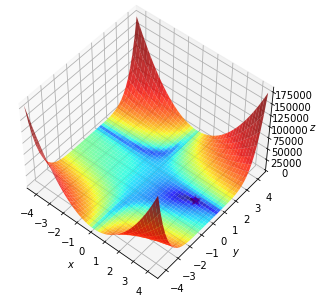

In [20]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, f(*minima), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### Question 3
Create a contour plot and a quiver plot of the function

In [21]:
dz_dx = gradf_x(x, y)
dz_dy = gradf_y(x, y)

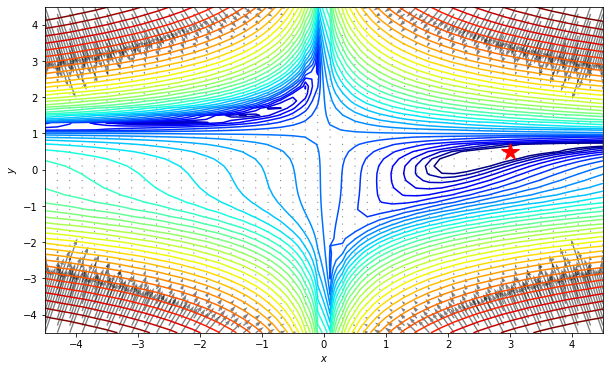

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, -dz_dx, -dz_dy, alpha=.5)
ax.plot(*minima, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [23]:
steps = 500

## Gradient Descent
This vanilla gradient descent: <br>
$\theta_t = \theta_{t-1} - \alpha\nabla_\theta f(\theta_{t-1})$

### Question 4
Implement vanilla gradient descent

In [24]:
alpha = 0.001
x0 = np.array([1.1, 2.])

In [25]:
x_gd = np.zeros((x0.shape[0], steps))
iteration = []
losses_gd = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
for i in range(steps):
    iteration.append(i)
    losses_gd.append(loss)
    x_gd[0, i] = x0[0]
    x_gd[1, i] = x0[1]
    dx = gradf_x(*x0) 
    dy = gradf_y(*x0)
    x0 = x0 - alpha*np.array([dx, dy])
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_gd.append(loss)
x_gd[0,-1] = x0[0]
x_gd[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[0.91695 1.67286], f:55.69284630818821, i:0
X:[0.85589412 1.55266555], f:40.57586080813729, i:1
X:[0.8166758  1.46934495], f:33.11609884809656, i:2
X:[0.78838671 1.40438797], f:28.57090238693833, i:3
X:[0.76681858 1.35065197], f:25.479556768710637, i:4
X:[0.74985445 1.30454489], f:23.225948090082575, i:5
X:[0.73626646 1.26398527], f:21.501585150784372, i:6
X:[0.72527423 1.22765245], f:20.133821241027402, i:7
X:[0.71634864 1.19465334], f:19.01809397002068, i:8
X:[0.70911317 1.16435457], f:18.087207306920547, i:9
X:[0.70328956 1.13629011], f:17.29593274477375, i:10
X:[0.69866579 1.11010681], f:16.61267452630164, i:11
X:[0.69507619 1.08553045], f:16.01467602151909, i:12
X:[0.69238855 1.06234384], f:15.485123169204522, i:13
X:[0.69049546 1.04037195], f:15.01132088816231, i:14
X:[0.68930821 1.01947167], f:14.583504457925686, i:15
X:[0.68875261 0.99952449], f:14.194041374534988, i:16
X:[0.6887658  0.98043118], f:13.836881389601574, i:17
X:[0.68929396 0.962

In [26]:
def Plot_Loss(iteration, losses):
    fig, ax = plt.subplots(figsize=(10, 6))    
    ax.semilogy(iteration, losses)
    ax.set_xlabel('$i$')
    ax.set_ylabel('$loss$')


In [27]:
def Plot_Trajectory(x_val, label):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.plot(x_val[0,:], x_val[1,:], 'b', label=label, lw=2)
    ax.plot(*minima, 'r*', markersize=18)
    ax.legend(loc='upper left')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))


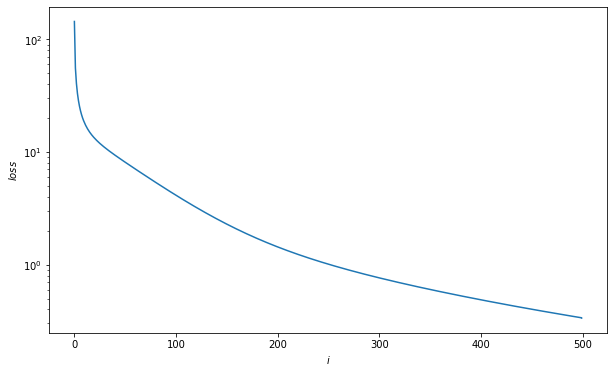

In [28]:
Plot_Loss(iteration, losses_gd)

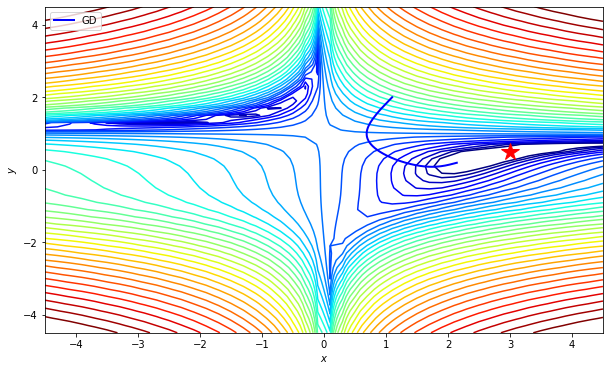

In [29]:
Plot_Trajectory(x_gd, 'GD')

## Momentum
GD with momentum helps accelerate GD and prevents it from being stuck in regions with small gradients: <br>
$v_t = \gamma v_{t-1} + \alpha \nabla_\theta f(\theta_{t-1})$ <br>
$\theta_t = \theta_{t-1} - v_t$

### Question 5
Implement GD with momentum

In [34]:
alpha = 0.001
gamma = 0.9
x0 = np.array([1.1, 2.])
dx = gradf_x(*x0) 
dy = gradf_y(*x0)

In [35]:
up = np.array([0., 0.])
iteration = []
losses_mom = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
x_mom = np.zeros((x0.shape[0], steps))
for i in range(steps):
    iteration.append(i)
    losses_mom.append(loss)
    x_mom[0, i] = x0[0]
    x_mom[1, i] = x0[1]
    dx = gradf_x(*x0) 
#   dx = graf_x(x0[0], x0[1])
    dy = gradf_y(*x0)
    up = gamma*up + alpha*np.array([dx, dy])
    x0 = x0 - up
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_mom.append(loss)
x_mom[0,-1] = x0[0]
x_mom[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[0.91695 1.67286], f:55.69284630818821, i:0
X:[0.69114912 1.25823955], f:20.816221959657987, i:1
X:[0.47739878 0.85179728], f:12.499361703333324, i:2
X:[0.28847623 0.47611137], f:11.533644504960538, i:3
X:[0.1272184  0.13517329], f:12.688597837394843, i:4
X:[-0.00635306 -0.17220566], f:14.286865326402596, i:5
X:[-0.11336513 -0.44883446], f:15.802674826379425, i:6
X:[-0.19512123 -0.69752278], f:17.207714514686877, i:7
X:[-0.25233941 -0.92026303], f:18.625816959878218, i:8
X:[-0.28457368 -1.11791202], f:20.10633354232062, i:9
X:[-0.2899111  -1.29031518], f:21.430492994255538, i:10
X:[-0.2652628 -1.4370561], f:22.00209129114588, i:11
X:[-0.20762606 -1.55889694], f:21.039140414204496, i:12
X:[-0.1162836  -1.65928207], f:18.169280539857052, i:13
X:[ 0.00481754 -1.74450087], f:14.049383348936747, i:14
X:[ 0.1454733  -1.82136438], f:10.44210432254898, i:15
X:[ 0.28876369 -1.89275108], f:9.559247850316684, i:16
X:[ 0.41198276 -1.95318103], f:12.4403486604338

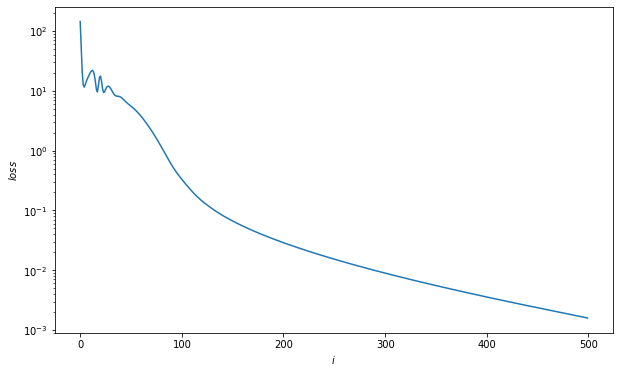

In [36]:
Plot_Loss(iteration, losses_mom)

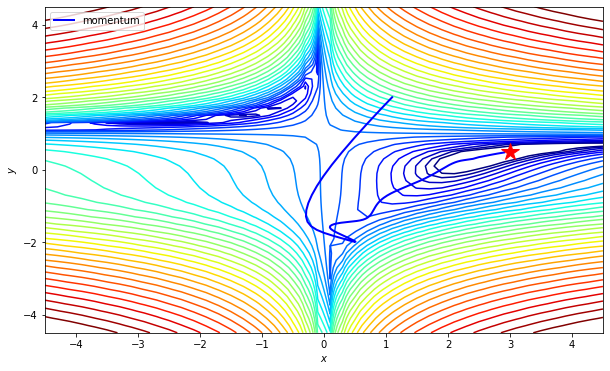

In [37]:
Plot_Trajectory(x_mom, 'momentum')

## Nesterov Accelerated Gradient (NAG)
NAG is very similar to momentum but it calculates the gradient at the next position to stabilize the learning process. <br>
$v_t = \gamma v_{t-1} + \alpha \nabla_\theta f(\theta_{t-1} - \gamma v_{t-1})$ <br>
$\theta_t = \theta_{t-1} - v_t$

### Question 6
Implement NAG

In [38]:
alpha = 0.001
gamma = 0.9
x0 = np.array([1.1, 2.])

In [39]:
iteration = []
losses_nag = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
up = np.array([0., 0.])
x_nag = np.zeros((x0.shape[0], steps))
for i in range(steps):
    iteration.append(i)
    losses_nag.append(loss)
    x_nag[0, i] = x0[0]
    x_nag[1, i] = x0[1]
    dx = gradf_x(*(x0 - gamma*up)) 
    dy = gradf_y(*(x0 - gamma*up))
    up = gamma*up + alpha*(np.array([dx, dy]))
    x0 = x0 - up
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_nag.append(loss)
x_nag[0,-1] = x0[0]
x_nag[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[0.91695 1.67286], f:55.69284630818821, i:0
X:[0.73314068 1.33065437], f:24.058928851256688, i:1
X:[0.56706428 1.00617372], f:14.300886433370298, i:2
X:[0.42338962 0.70753309], f:11.579471291793642, i:3
X:[0.30314466 0.43613244], f:11.292931224276787, i:4
X:[0.20589519 0.19093529], f:11.846113953146276, i:5
X:[ 0.13048195 -0.03003996], f:12.580317498516658, i:6
X:[ 0.07544415 -0.22902072], f:13.221963503671995, i:7
X:[ 0.03929397 -0.40815223], f:13.675338354525323, i:8
X:[ 0.0206687  -0.56939057], f:13.916263181011399, i:9
X:[ 0.01837779 -0.71452298], f:13.938142254534709, i:10
X:[ 0.03135871 -0.845248  ], f:13.7311409559763, i:11
X:[ 0.05855451 -0.96325891], f:13.282606872558837, i:12
X:[ 0.09872868 -1.07027641], f:12.591070516229518, i:13
X:[ 0.15023833 -1.16797793], f:11.687588546448382, i:14
X:[ 0.21079087 -1.25778404], f:10.657474951600893, i:15
X:[ 0.27722033 -1.34049718], f:9.652413365838692, i:16
X:[ 0.34535554 -1.41586338], f:8.8758205465968

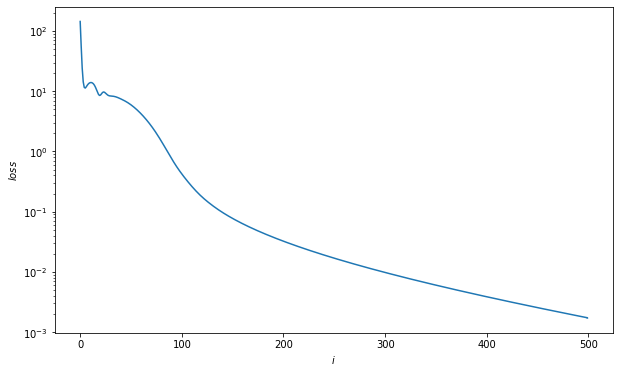

In [40]:
Plot_Loss(iteration, losses_nag)

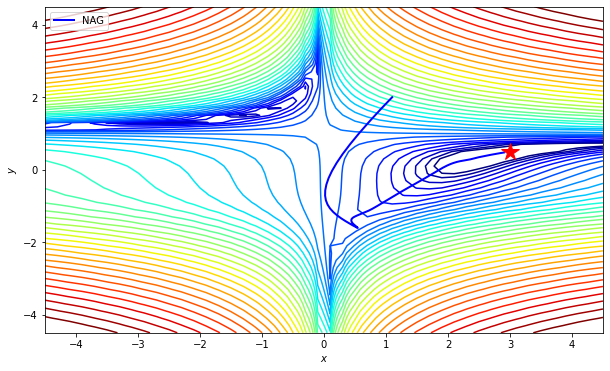

In [41]:
Plot_Trajectory(x_nag, 'NAG')

## Adagrad
Adagrad adapts the learning rate based on the frequency of previous parameter updates. <br>
more updates --> smaller learning rate <br>
less updates --> higher learning rate <br>
$G_t = G_{t-1} + \left(\nabla_\theta f(\theta_{t-1})\right)^2$ <br>
$\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{G_t + \epsilon}}\nabla_\theta f(\theta_{t-1})$ <br>
with $G_0 = \vec{0}$

### Question 7
Implement Adagrad

In [43]:
alpha = 1.0
x0 = np.array([1.1, 2.])
Eg = np.zeros(x0.shape)
epsilon = 1e-8

In [44]:
x_adag = np.zeros((x0.shape[0], steps))
iteration = []
losses_adag = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
for i in range(steps):
    iteration.append(i)
    losses_adag.append(loss)
    x_adag[0, i] = x0[0]
    x_adag[1, i] = x0[1]
    dx = gradf_x(*x0) 
    dy = gradf_y(*x0)
    Eg = Eg + np.array([dx**2, dy**2])
    x0 = x0 - (alpha/np.sqrt(Eg + epsilon))*np.array([dx, dy])
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_adag.append(loss)
x_adag[0,-1] = x0[0]
x_adag[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[0.1 1. ], f:14.203125000000131, i:0
X:[0.1       0.9915177], f:14.179741929561143, i:1
X:[0.10127687 0.98314747], f:14.156381712099218, i:2
X:[0.1037961  0.97478157], f:14.131907464212912, i:3
X:[0.10753953 0.96632093], f:14.105241881611349, i:4
X:[0.11250301 0.95767361], f:14.075317393286813, i:5
X:[0.11869448 0.94875366], f:14.041037369988537, i:6
X:[0.12613215 0.93948042], f:14.001246065231921, i:7
X:[0.1348428  0.92977823], f:13.954706188766403, i:8
X:[0.14486007 0.91957635], f:13.900083919028475, i:9
X:[0.15622276 0.90880926], f:13.83594184324397, i:10
X:[0.16897296 0.89741714], f:13.760740803044401, i:11
X:[0.1831541  0.88534668], f:13.672851909771797, i:12
X:[0.19880883 0.872552  ], f:13.570580038831308, i:13
X:[0.21597681 0.85899579], f:13.452199863886138, i:14
X:[0.23469232 0.84465051], f:13.316004900056402, i:15
X:[0.25498188 0.82949958], f:13.160369067058303, i:16
X:[0.27686189 0.81353859], f:12.983818986089533, i:17
X:[0.30033636 0.79677

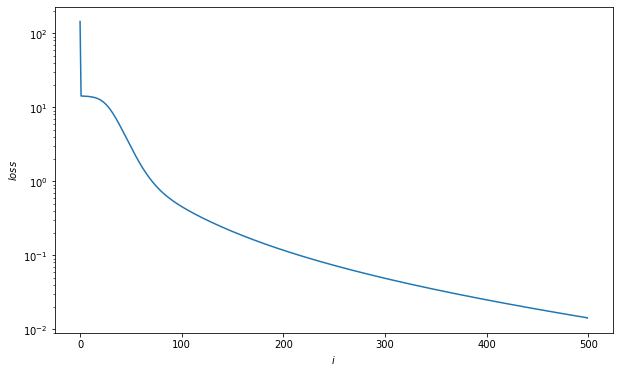

In [45]:
Plot_Loss(iteration, losses_adag)

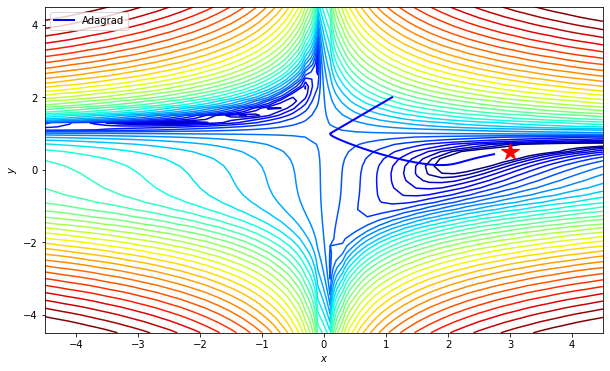

In [46]:
Plot_Trajectory(x_adag, 'Adagrad')

## RMSprop
RMSprop is very similar to Adagrad but it keeps the average over a finite window resolving the radically diminishing learning rates. <br>
$G_t = 0.9G_{t-1} + 0.1\left(\nabla_\theta f(\theta_{t-1})\right)^2$ <br>
$\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{G_t + \epsilon}}\nabla_\theta f(\theta_{t-1})$ <br>
with $G_0 = \vec{0}$

### Question 8
Implement RMSprop

In [47]:
alpha = 0.01
x0 = np.array([1.1, 2.])
Eg = np.zeros(x0.shape)
epsilon = 1e-8

In [48]:
x_rms = np.zeros((x0.shape[0], steps))
iteration = []
losses_rms = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
for i in range(steps):
    iteration.append(i)
    losses_rms.append(loss)
    x_rms[0, i] = x0[0]
    x_rms[1, i] = x0[1]
    dx = gradf_x(*x0) 
    dy = gradf_y(*x0)
    Eg = 0.9*Eg + 0.1*np.array([dx**2, dy**2])
    x0 = x0 - (alpha/np.sqrt(Eg + epsilon))*np.array([dx, dy])
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_rms.append(loss)
x_rms[0,-1] = x0[0]
x_rms[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[1.06837722 1.96837722], f:128.9170262931398, i:0
X:[1.04665688 1.94673922], f:119.42876800529216, i:1
X:[1.0290295  1.92921909], f:112.27015556579204, i:2
X:[1.01373584 1.9140453 ], f:106.42770927161203, i:3
X:[0.99997735 1.90041482], f:101.44851106803749, i:4
X:[0.98731496 1.88788647], f:97.08651618234845, i:5
X:[0.97547794 1.8761884 ], f:93.19156192820907, i:6
X:[0.9642861  1.86513976], f:89.66457119962611, i:7
X:[0.95361273 1.85461338], f:86.43639979531524, i:8
X:[0.94336495 1.8445161 ], f:83.45670161480058, i:9
X:[0.93347244 1.83477738], f:80.68757782491787, i:10
X:[0.92388057 1.82534243], f:78.09972355495593, i:11
X:[0.91454599 1.81616778], f:75.66997196433744, i:12
X:[0.90543368 1.80721829], f:73.37966476967297, i:13
X:[0.89651494 1.79846517], f:71.21353435588972, i:14
X:[0.88776592 1.78988452], f:69.15891486219184, i:15
X:[0.87916663 1.78145624], f:67.20517177630504, i:16
X:[0.8707001  1.77316333], f:65.34328076431352, i:17
X:[0.86235184 1.76

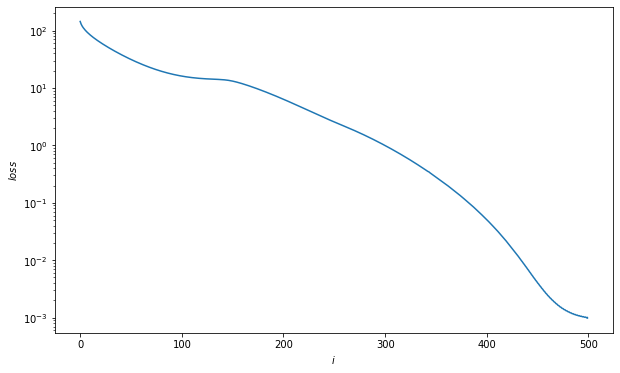

In [49]:
Plot_Loss(iteration, losses_rms)

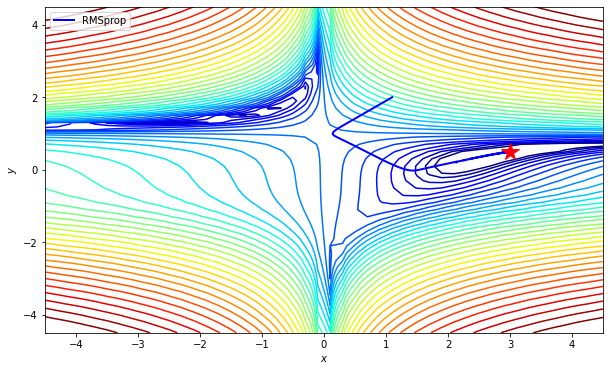

In [50]:
Plot_Trajectory(x_rms, 'RMSprop')

## Adam
Adam is an optimizer that combines momentum GD and learning rate adaptation. <br>
$m_t = \beta_1 m_{t-1} + (1-\beta1)\nabla_\theta f(\theta_{t-1})$ <br>
$v_t = \beta_2 v_{t-1} + (1-\beta2)\left(\nabla_\theta f(\theta_{t-1})\right)^2$ <br>
$\hat{m}_t = \frac{m_t}{1-{\beta_1}^t}$ <br>
$\hat{v}_t = \frac{v_t}{1-{\beta_2}^t}$ <br>
$\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{\hat{v}_t + \epsilon}}\hat{m}_t$ <br>
with $m_0 = v_0 = \vec{0}$

### Question 9
Implement Adam

In [51]:
alpha = 0.01
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.9
x0 = np.array([1.1, 2.])
mt = np.array([0., 0.])
vt = np.array([0., 0.])

In [52]:
iteration = []
losses_adam = []
loss = f(*x0)
print(f'X:{x0}, f:{loss}')
x_adam = np.zeros((x0.shape[0], steps))
for i in range(steps):
    iteration.append(i)
    losses_adam.append(loss)
    x_adam[0, i] = x0[0]
    x_adam[1, i] = x0[1]
    dx = gradf_x(*x0) 
    dy = gradf_y(*x0)
    mt = beta1*mt + (1-beta1)*np.array([dx, dy])
    vt = beta2*vt + (1-beta2)*np.array([dx**2, dy**2])
    mthat = mt/(1-beta1**(i+1))
    vthat = vt/(1-beta2**(i+1))
    x0 = x0 - (alpha/np.sqrt(vthat + epsilon))*mthat
    loss = f(*x0)
    print(f'X:{x0}, f:{loss}, i:{i}')

iteration.append(i)
losses_adam.append(loss)
x_adam[0,-1] = x0[0]
x_adam[1,-1] = x0[1]

X:[1.1 2. ], f:144.16812500000003
X:[1.09 1.99], f:139.15655408621691, i:0
X:[1.08000148 1.98000168], f:134.3225311596108, i:1
X:[1.07000543 1.97000616], f:129.66078154177052, i:2
X:[1.06001284 1.96001458], f:125.16612537590677, i:3
X:[1.0500247  1.95002805], f:120.83347779178297, i:4
X:[1.040042   1.94004771], f:116.65784920236271, i:5
X:[1.0300657  1.93007464], f:112.6343457073848, i:6
X:[1.02009678 1.92010996], f:108.75816957878567, i:7
X:[1.01013616 1.91015473], f:105.02461980297127, i:8
X:[1.00018477 1.90021   ], f:101.42909265537838, i:9
X:[0.99024351 1.89027681], f:97.96708228354305, i:10
X:[0.98031325 1.88035615], f:94.63418127597895, i:11
X:[0.97039483 1.87044898], f:91.42608119553682, i:12
X:[0.96048907 1.86055625], f:88.33857305751937, i:13
X:[0.95059675 1.85067885], f:85.3675477346319, i:14
X:[0.9407186  1.84081763], f:82.50899627281238, i:15
X:[0.93085533 1.83097341], f:79.75901010405728, i:16
X:[0.92100761 1.82114697], f:77.1137811445052, i:17
X:[0.91117607 1.81133903], f

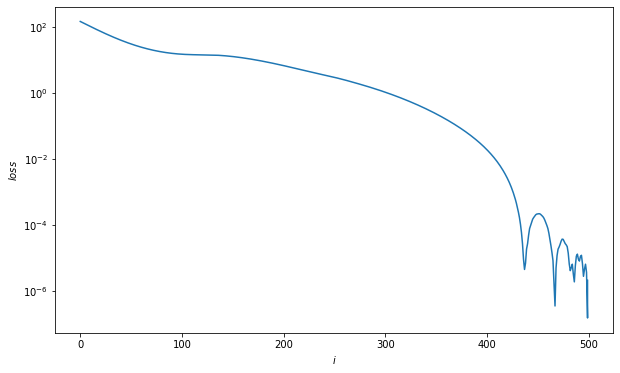

In [53]:
Plot_Loss(iteration, losses_adam)

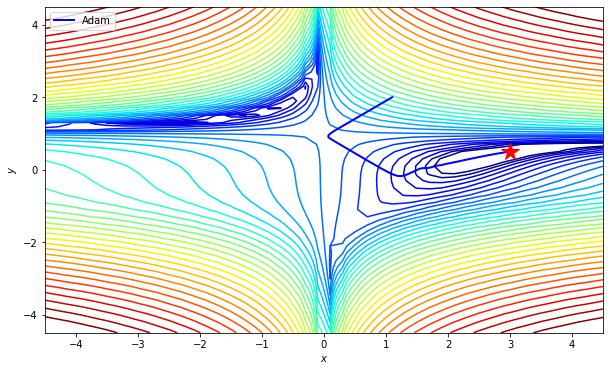

In [54]:
Plot_Trajectory(x_adam, 'Adam')

## Simulate Animation

In [55]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [56]:
def Plot_Losses(iteration, labels, losses):
    fig, ax = plt.subplots(figsize=(10, 6))
    for loss in losses:
        ax.semilogy(iteration, loss)
    ax.legend(labels)
    ax.set_xlabel('i')
    ax.set_ylabel('loss')


### Question 10
Use the function `TrajectoryAnimation()` to make an animation that shows the learning process of each method and comment on the results.

In [57]:
methods = ["GD", "Momentum", "NAG", "Adagrad", "RMSprop", "Adam"]

In [58]:
paths = [x_gd[:,0:-1:10], x_mom[:,0:-1:10], x_nag[:,0:-1:10],
         x_adag[:,0:-1:10], x_rms[:,0:-1:10], x_adam[:,0:-1:10]]

In [59]:
losses = [losses_gd, losses_mom, losses_nag, losses_adag, losses_rms, losses_adam]

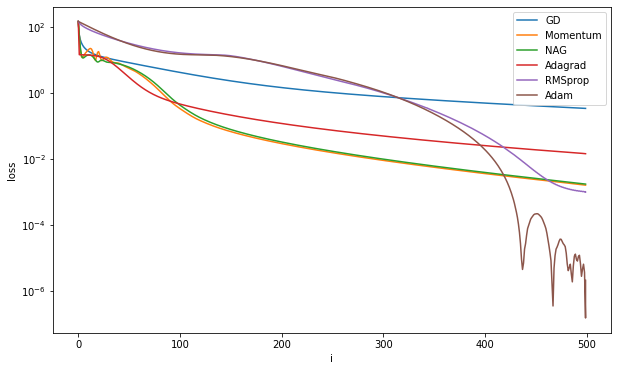

In [60]:
Plot_Losses(iteration, methods, losses)

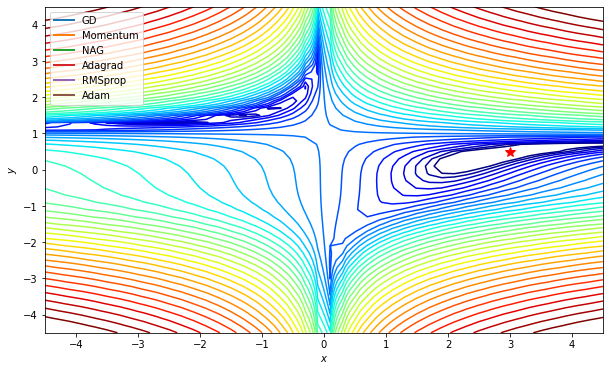

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [50]:
HTML(anim.to_html5_video())